# Análise dos Dados do ENEM 2019

<p align="justify">O objetivo principal do experimento é inferir sob as diferenças entre os alunos que realizaram o ENEM 2019 por região do país, partindo de que foi realizada de forma separada uma analise exploratorio dos dados de forma mais aprofundada, exaltando somente alguns pontos de interesse. Este estudo será feito através da comparação da nota total média de todas as provas no ENEM. Um segundo objetivo é levantar alguns pontos relacionando as diferenças encontradas, ou não, com os dados sobre os "gastos" com educação 2018 emitido pelo Portal da Transparência. Com isso, objetiva-se identificar quaisquer diferenças entre as notas médias e verificar e levantar discussões com os reflexos dos investimentos em 2018 no ENEM 2019.</p>

<p align="justify">É observado a redução dos gastos públicos com educação nos últimos anos e com esta analise tem-se o interesse discutir os impactos que essa redução possa acarretar aos estudantes do país. Os problemas da falta de investimento em educação são muitos e algumas destes podem refletir no ENEM, como, por exemplo: Evasao escolar, dificuldades no aprendizado resultando em notas mais baixas.</p>

<p align="justify">Para este estudo, serão considerados somente os alunos do ensino médio que identificaram como realizando o ensino médio em escola pública e que estão para formar em 2019 ou adiante. Serão desconsiderados aqueles alunos que tiraram nota zero em alguma das provas.</p>


O estudo é divido nas seguintes etapas:
1. Carregamento e Adequação dos Dados 
2. Análise Exploratória e Tratamento
3. Análise Estatística dos Dados ENEM 2019
4. Conclusões e Discussões
5. Referências

In [ ]:
#Principais bibliotecas utilizadas para estas analises
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%matplotlib inline

plt.style.use('seaborn')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1) Carregamento e Adequação dos Dados

Nesta primeira etapa, foram carregados os dados proposto no desafio, além de um segundo conjunto de dados a respeito das despesas em educação, extraídos do portal da transparência e uma tabela com as siglas dos estados e divisão de região para facilitar algumas operações.

In [ ]:
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
notas = pd.read_csv(fonte) # Lendo os dados provenientes da fonte em formato HTML 

In [ ]:
notas.head() #Verificando dados (notas) carregados 

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [ ]:
#Fonte2: http://www.portaltransparencia.gov.br/funcoes/12-educacao?ano=2018 - transformados em tabela em um txt
siglas = pd.read_csv('/content/Siglas.txt', sep = '\t', header = 0) #Conjunto de dados contendo somente a relacao de siglas/regiao/Nome do estado
despesas = pd.read_csv('/content/GastosBR2018.txt', sep = '\t', header = 0) #Conjunto com a relacao de estado e despesas 2018 *Fonte2

#Funcoes utilizadas para "limpar os dados coletados da Fonte2 e da tabela Siglas"
def cleanDatasetRegion(col):
    region = col[21:]
    return region

def cleanDatasetValorPago(col):
    valor = float(col[3:].replace('.','').replace(',','.'))
    return valor


In [ ]:
#Verificando a relacao de  siglas/regiao e os valores de despesas por regiao 
siglas.head()

,LOCALIDADE,Sigla,Observação
0,Acre,AC,Localizado na Região Norte
1,Alagoas,AL,Localizado na Região Nordeste
2,Amapá,AP,Localizado na Região Norte
3,Amazonas,AM,Localizado na Região Norte
4,Bahia,BA,Localizado na Região Nordeste


In [ ]:
despesas.head()

,LOCALIDADE,VALOR PAGO (R$)
0,Acre,"R$ 330.331.122,56"
1,Alagoas,"R$ 923.003.838,14"
2,Amapá,"R$ 246.988.692,99"
3,Amazonas,"R$ 849.438.915,52"
4,Bahia,"R$ 2.173.435.914,43"


In [ ]:
#Limpando a coluna Observacao e transformando para Regiao
siglas['REGIAO'] = siglas['Observação'].apply(cleanDatasetRegion)
siglas.drop('Observação',axis =1,  inplace = True)
#Limpando e transformando para float o valor pago
despesas['VALOR PAGO (R$)'] = despesas['VALOR PAGO (R$)'].apply(cleanDatasetValorPago)

In [ ]:
despesas.head() # Dataset Despesas limpo

,LOCALIDADE,VALOR PAGO (R$)
0,Acre,3.303311e+08
1,Alagoas,9.230038e+08
2,Amapá,2.469887e+08
3,Amazonas,8.494389e+08
4,Bahia,2.173436e+09


In [ ]:
siglas.head() # Dataset Siglas limpo

,LOCALIDADE,Sigla,REGIAO
0,Acre,AC,Norte
1,Alagoas,AL,Nordeste
2,Amapá,AP,Norte
3,Amazonas,AM,Norte
4,Bahia,BA,Nordeste


In [ ]:
#Unindo os datasets despesas e siglas
despesas = pd.merge(despesas,siglas, on = 'LOCALIDADE')

In [ ]:
#Unindo os datasets notas e despesas extendido
notas_despesas = pd.merge(notas, despesas.rename(columns = {'Sigla':'SG_UF_RESIDENCIA'}), on = 'SG_UF_RESIDENCIA')

In [ ]:
notas_despesas.head() 

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,LOCALIDADE,VALOR PAGO (R$),REGIAO
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,Pará,1.811992e+09,Norte
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,Pará,1.811992e+09,Norte
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,Pará,1.811992e+09,Norte
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,Pará,1.811992e+09,Norte
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,Pará,1.811992e+09,Norte


Adicionando a coluna da soma das notas totais dos alunos

In [ ]:
provas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_REDACAO'] 
notas_despesas['NU_NOTA_TOTAL'] = notas_despesas[provas].sum(axis = 1)

In [ ]:
notas_despesas.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,LOCALIDADE,VALOR PAGO (R$),REGIAO,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,Pará,1.811992e+09,Norte,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,Pará,1.811992e+09,Norte,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,Pará,1.811992e+09,Norte,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,Pará,1.811992e+09,Norte,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,Pará,1.811992e+09,Norte,2803.5


## 2) Análise Exploratória e Tratamento

### 2.1) Dados do ENEM 2019

<p align="justify">Como esta análise envolve verificar a relação das medias das notas dos estudantes de escolas publicas, opta-se por remover aqueles alunos que assinalaram escola como de Privada. Nos dados, a coluna TP_ESCOLA classifica o tipo de ensino do aluno, onde: 1 - Não Respondeu, 2- Publica, 3- Privada e 4 - Exterior. No gráfico abaixo é possível observar que a grande maioria dos alunos que responderam a pesquisa é de escolas públicas e o restante de escolas privadas. Vale notar que muitos não respoderam a pergunta</p>

Text(0.5, 1.0, 'Contagem de Alunos em cada Tipo de Escola do Ensino Medio')

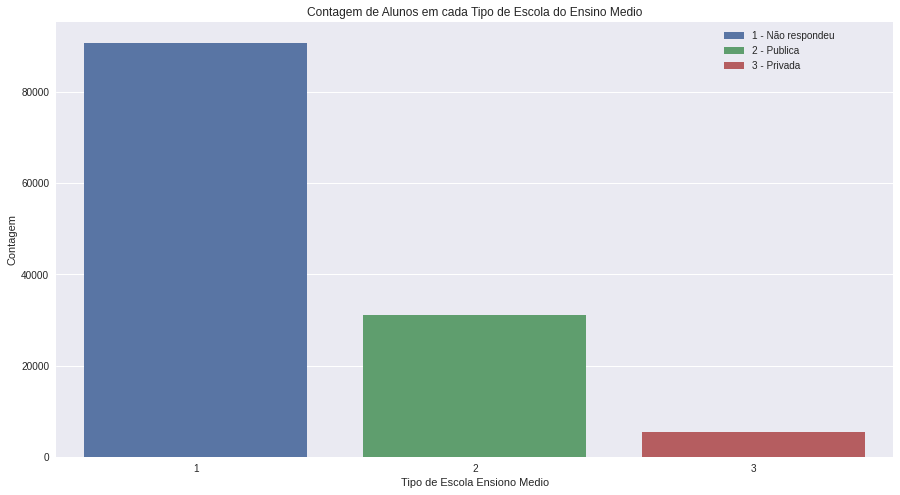

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x = notas_despesas['TP_ESCOLA'], hue =notas_despesas['TP_ESCOLA'], dodge = False)
ax.legend(['1 - Não respondeu','2 - Publica','3 - Privada'],bbox_to_anchor=(0.94,1))
plt.ylabel('Contagem')
plt.xlabel('Tipo de Escola Ensiono Medio')
plt.title('Contagem de Alunos em cada Tipo de Escola do Ensino Medio')


Como o estudo propõem depois verificar a prova em 2019 e relacionar com os valores investidos em educação em 2018, é interessante verificar agora a faixa de alunos que concluirão o Ensino Médio em 2019 e após 2019, já que estes utilizam ou utilizaram dos recursos de 2018.

Text(0.5, 1.0, 'Conatagem da Situacao de Conclusao do aluno no Ensino Medio')

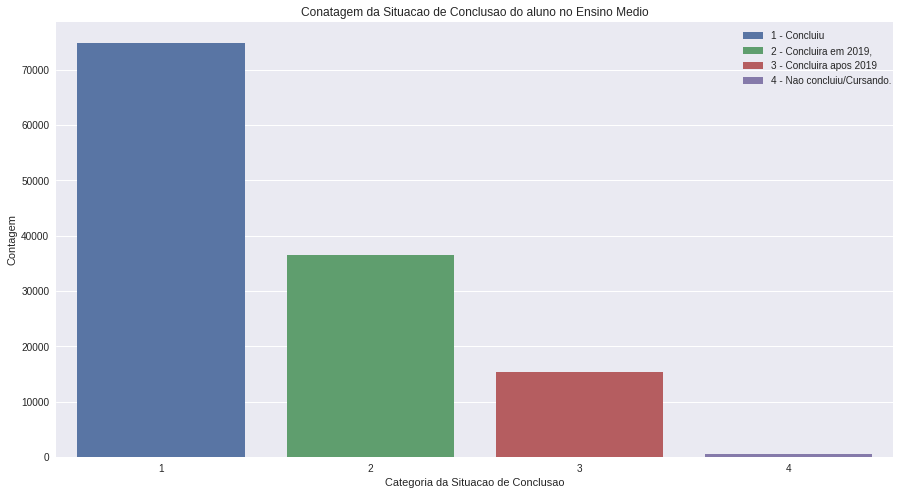

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x = notas_despesas['TP_ST_CONCLUSAO'], hue =notas_despesas['TP_ST_CONCLUSAO'], dodge = False)
ax.legend(['1 - Concluiu','2 - Concluira em 2019,','3 - Concluira apos 2019', '4 - Nao concluiu/Cursando.'],
          bbox_to_anchor=(0.81,1))
plt.ylabel('Contagem')
plt.xlabel('Categoria da Situacao de Conclusao')
plt.title('Conatagem da Situacao de Conclusao do aluno no Ensino Medio')

<p align="justify">Dos  gráficos apresentados acima, é possível observar que há uma grande quantidade de alunos que não informaram a situação referente ao Ensino Médio. Neste caso, opta-se por remover todos os alunos fora da faixa estabelecida pela análise. Essa ação pode resultar em uma perda de acurácia nos resultados, pois são removidos muitos valores. É válido para uma análise mais aprofundada, buscar minimizar a quantidade de dados eliminados.</p>

In [ ]:
notas_despesas_reduzidas = notas_despesas[(notas_despesas['TP_ESCOLA'] == 2)] 
notas_despesas_reduzidas = notas_despesas_reduzidas[(notas_despesas_reduzidas['TP_ST_CONCLUSAO'] == 2) | (notas_despesas_reduzidas['TP_ST_CONCLUSAO'] == 3)]
notas_despesas_reduzidas = notas_despesas_reduzidas.query('NU_NOTA_MT >0 and NU_NOTA_CH >0 and NU_NOTA_CN >0 and NU_NOTA_LC >0 and NU_NOTA_LC >0 and NU_NOTA_TOTAL >0 ')

In [ ]:
notas_despesas_reduzidas.shape

(25080, 140)

In [ ]:
notas_despesas_reduzidas.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,LOCALIDADE,VALOR PAGO (R$),REGIAO,NU_NOTA_TOTAL
5,190001004841,2019,1503606,Itaituba,15,PA,18,F,1,3,1,1503606.0,Itaituba,15.0,PA,2,0,2,1.0,0,15152120.0,1503606.0,Itaituba,15.0,PA,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,140.0,200.0,200.0,200.0,160.0,900.0,D,E,B,C,2,C,A,B,C,A,C,B,B,A,A,B,A,A,B,A,A,D,A,B,B,Pará,1.811992e+09,Norte,3301.4
19,190001005269,2019,1505809,Portel,15,PA,18,M,1,3,1,1505809.0,Portel,15.0,PA,2,0,2,1.0,0,15021564.0,1505809.0,Portel,15.0,PA,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,40.0,40.0,120.0,20.0,340.0,B,D,B,B,4,C,A,B,A,A,A,B,B,B,A,A,A,A,B,B,A,C,A,A,A,Pará,1.811992e+09,Norte,2380.3
22,190001005335,2019,1501402,Belém,15,PA,19,F,1,3,1,1501402.0,Belém,15.0,PA,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,4.0,0.0,0.0,0.0,0.0,0.0,0.0,H,E,C,B,3,B,A,B,C,A,A,B,A,B,A,B,A,A,B,A,A,B,A,A,B,Pará,1.811992e+09,Norte,1874.4
31,190001005747,2019,1504802,Monte Alegre,15,PA,20,M,1,3,1,1504802.0,Monte Alegre,15.0,PA,2,0,2,1.0,0,15007324.0,1504802.0,Monte Alegre,15.0,PA,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,80.0,120.0,100.0,100.0,120.0,520.0,D,D,A,B,5,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,Pará,1.811992e+09,Norte,2574.8
33,190001005812,2019,1502400,Castanhal,15,PA,18,F,1,3,1,1502400.0,Castanhal,15.0,PA,2,0,2,1.0,0,15045471.0,1502400.0,Castanhal,15.0,PA,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,80.0,120.0,80.0,100.0,80.0,460.0,H,E,C,F,4,A,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B,Pará,1.811992e+09,Norte,2220.3


In [ ]:
notas_despesas_reduzidas.shape #Resultado final do dataset

(25080, 140)

<p align="justify">Considerando os dados da amostra de alunos da rede pública com previsão de conclusão a partir de 2019, tem-se abaixo o gráfico com os números de alunos que realizaram o ENEM 2019 por estado. Considerando o estado de residência do aluno, onde supostamente seria aquele que teria estudado.</p>

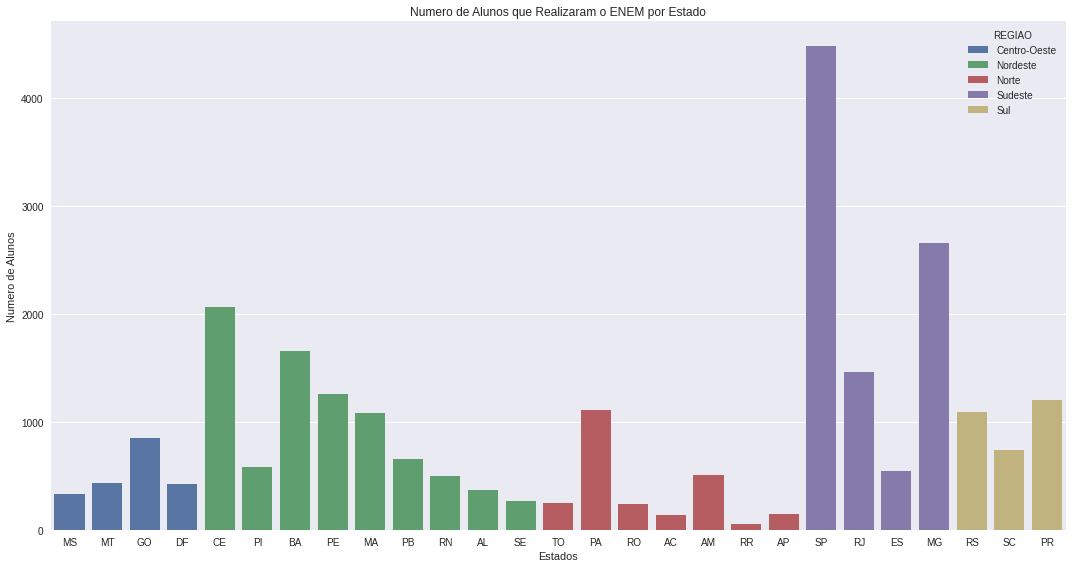

In [ ]:
plt.figure(figsize = (15,8))
tempData = notas_despesas_reduzidas.copy()
tempData.sort_values(by = 'REGIAO',inplace = True)
sns.countplot(x = tempData['SG_UF_RESIDENCIA'], hue = tempData['REGIAO'],dodge=False)
plt.title('Numero de Alunos que Realizaram o ENEM por Estado')
plt.ylabel('Numero de Alunos')
plt.xlabel('Estados')
plt.tight_layout()

Desta amostra reduzida, tem-se o total de estudantes por região. Sudeste e Nordeste são os que tem o maior número de alunos e o Centro-Oeste e o Norte com os menores números.

In [ ]:
totalAlunosAmostra = (notas_despesas_reduzidas.groupby('REGIAO')['SG_UF_RESIDENCIA'].count()).sort_values()
print(totalAlunosAmostra)

REGIAO
Centro-Oeste    2039
Norte           2430
Sul             3035
Nordeste        8433
Sudeste         9143
Name: SG_UF_RESIDENCIA, dtype: int64


<p align="justify">A seguir são apresentados o histograma e o boxplot das notas totais dos alunos, agrupadas por região. As médias das notas totais, aparentam estar entre 2400 e 2600. Sudeste e sul demonstram as maiores notas, mais valores ao extremo do eixo x. Nordeste, por outro lado, uma maior concentração de notas médias mais baixas. Outro ponto que pode ser observado no total de alunos, é que os dados por região estão significativamente desbalanceados.</p>

Text(0.5, 1.0, 'Histograma das Notas Totais por Região')

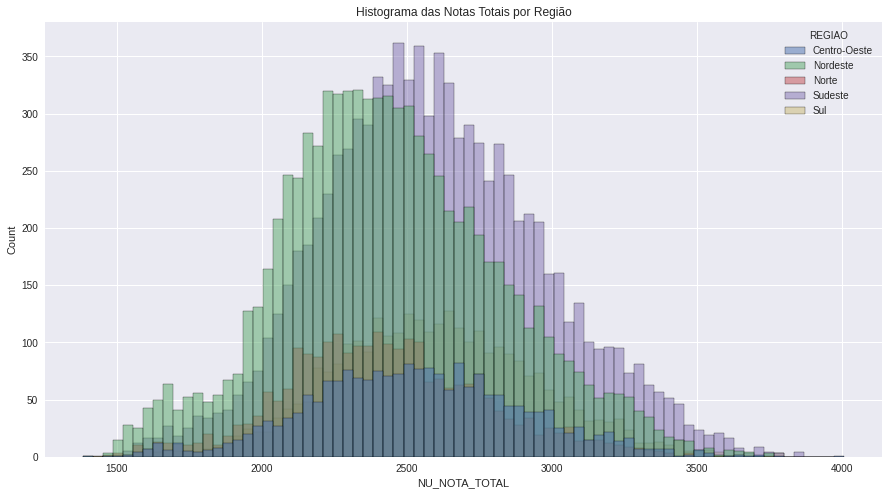

In [ ]:
plt.figure(figsize = (15,8))
sns.histplot(tempData[tempData['NU_NOTA_TOTAL'] >0], x = 'NU_NOTA_TOTAL', hue = 'REGIAO')
plt.title('Histograma das Notas Totais por Região')

Text(0.5, 1.0, 'Boxplot das Notas Totais por Região')

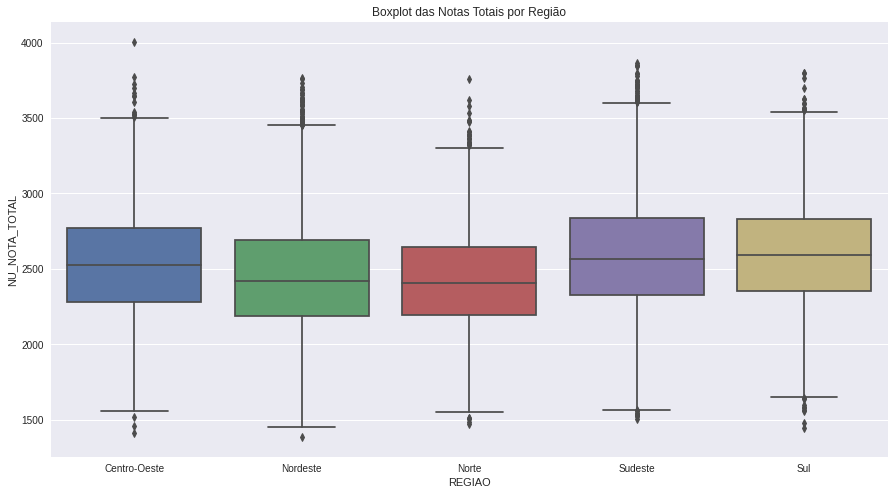

In [ ]:
plt.figure(figsize = (15,8))
sns.boxplot(y = 'NU_NOTA_TOTAL', x = 'REGIAO',data = tempData)
plt.title('Boxplot das Notas Totais por Região')

<p align="justify">Portanto, opta-se por balancear os dados, nivelando próximo a quantidade do menor grupo, Centro-Oeste. Assim, realiza-se uma amostragem aleatória com um tamanho de 2000 amostras nos dados já filtrados para cada região. 

Obs: Remover dados não é visto uma boa prática e pode fortemente atrapalhar análises, porém para equilibrar os dados e considerando que 2000 amostras ainda é numero grande, será adotado.</p>

In [ ]:
#Coletando somente as notas totais por região
norte = notas_despesas_reduzidas[notas_despesas_reduzidas['REGIAO'] == 'Norte']['NU_NOTA_TOTAL']
centro_oeste = notas_despesas_reduzidas[notas_despesas_reduzidas['REGIAO'] == 'Centro-Oeste']['NU_NOTA_TOTAL']
nordeste = notas_despesas_reduzidas[notas_despesas_reduzidas['REGIAO'] == 'Nordeste']['NU_NOTA_TOTAL']
sul = notas_despesas_reduzidas[notas_despesas_reduzidas['REGIAO'] == 'Sul']['NU_NOTA_TOTAL']
sudeste = notas_despesas_reduzidas[notas_despesas_reduzidas['REGIAO'] == 'Sudeste']['NU_NOTA_TOTAL']

#Como há um forte desbalanceamento dos dados, optou-se por coletar aleatoriamente apenas 2000 dados das amostras reduzidas.
np.random.seed(654321)
tamanho = 2000
norte = norte.iloc[np.random.choice(range(0,len(norte)),tamanho)]
centro_oeste = centro_oeste.iloc[np.random.choice(range(0,len(centro_oeste)),tamanho)]
nordeste = nordeste.iloc[np.random.choice(range(0,len(nordeste)),tamanho)]
sul = sul.iloc[np.random.choice(range(0,len(sul)),tamanho)]
sudeste = sudeste.iloc[np.random.choice(range(0,len(sudeste)),tamanho)] 

O boxplot seguinte demonstra que a nova reamostragem com 2000 amostras em cada grupo

Text(0.5, 1.0, 'Boxplot das Notas Totais por Região')

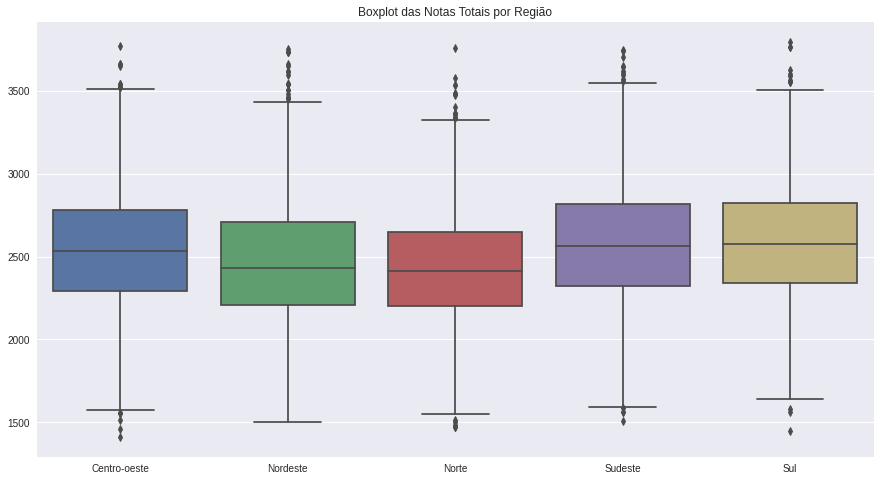

In [ ]:
df = pd.DataFrame()
df['Centro-oeste'] = centro_oeste.values
df['Nordeste'] = nordeste.values
df['Norte'] = norte.values
df['Sudeste'] = sudeste.values
df['Sul'] = sul.values
plt.figure(figsize = (15,8))
sns.boxplot(data = df)
plt.title('Boxplot das Notas Totais por Região')

### 2.2) Dados Despesas em Educação em 2018

<p align="justify">Na sequência têm-se as despesas com educação em 2018 por estado e região divulgadas pelo Portal da Transparência. Uma análise superficial entre o "Histograma das Notas Totais por Região" e "Dinheiro Investido em Educação por Estado em 2018" denota alguma relação entre os maiores investimentos em regiões onde se tem um maior número de alunos que prestaram ao Enem 2019.</p>

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Dinheiro Investido em Educação por Estado em 2018')

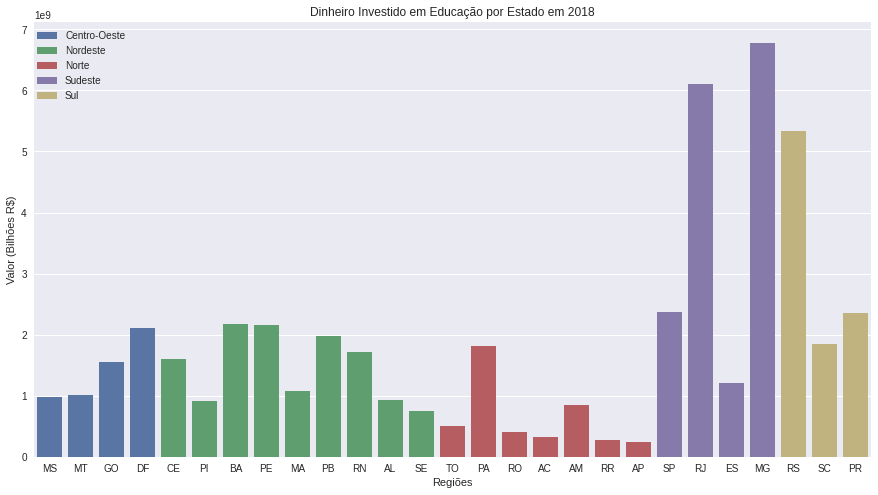

In [ ]:
plt.figure(figsize=(15,8))
tempData = notas_despesas_reduzidas.copy()
tempData.sort_values(by = 'REGIAO',inplace = True)
ax = sns.barplot(tempData['SG_UF_RESIDENCIA'],tempData['VALOR PAGO (R$)'], hue = tempData['REGIAO'],dodge=False)
ax.legend(bbox_to_anchor=(0.12,1))

plt.xlabel('Regiões')
plt.ylabel('Valor (Bilhões R$)')
plt.title('Dinheiro Investido em Educação por Estado em 2018')

Abaixo é possível observar o total investido por região: Norte é a região com o menor investimento, e Sudeste e Nordeste as de maior .

In [ ]:
totalDespesas = (despesas.groupby('REGIAO')['VALOR PAGO (R$)'].sum()).sort_values()
print(totalDespesas)

REGIAO
Norte           4.425645e+09
Centro-Oeste    5.648779e+09
Sul             9.546280e+09
Nordeste        1.330185e+10
Sudeste         1.647848e+10
Name: VALOR PAGO (R$), dtype: float64


## 3) Análise Estatística dos Dados

<p align="justify">Como o intuito do experimento é observar as diferenças das médias das notas dos alunos de escolas públicas por região, é definida uma hipótese nula unilateral com relação as diferenças das médias para cada população. Já a hipótese alternativa, encontrar diferença em pelo menos uma das médias. Assim, defini-se matematicamente como sendo:</p>

$$\begin{cases} H_0: \mu_{Norte} = \mu_{Centro-Oeste} = \mu_{Nordeste}  = \mu_{Sul} = \mu_{Sudeste} &\\H_1: \exists i,j \ | \ \mu_i \neq \mu_j\end{cases}$$ \

<p align="justify">Inicialmente, deseja-se testar estas hipóteses através análise de Variância (ANOVA) onde são comparadas as médias de diferentes amostras para verificar se essas populações possuem médias iguais ou não. Para realizar a análise da ANOVA, é necessário primeiramente garantir algumas premissas que a validam, sendo estas as:</p>

1. Devem seguir uma distribuição normal.
2. As variâncias devem ser iguais.
3. Os dados devem ser independentes e aleatórios.

Portanto, são realizados os testes para garantir as premissas.

### 3.1) Teste de Normalidade

Primeiramente é testado quanto a normalidade dos dados. Neste quesito é executado um plot Quantil a Quantil, também conhecido de q-q plot. Nos gráficos abaixo é possível verificar que cada subpopulação, definida por região, aproxima de uma distribuição normal. Assim, além de uma quantidade suficiente de dados coletados, (atendendo ao teorema central do limite) pode-se inferir que os dados são suficientemente normais.

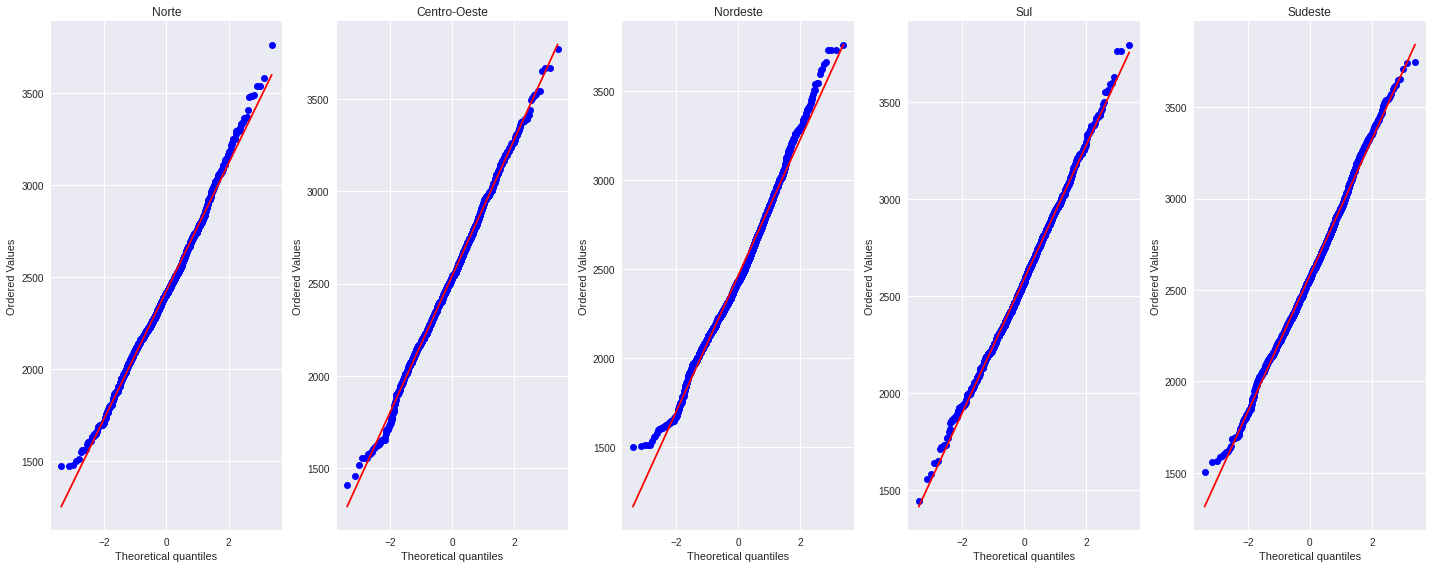

In [ ]:
#Q-Q plot para verrificar a Normalidade dos dados.
plt.figure(figsize = (20,8))
plt.subplot(1, 5, 1)
stats.probplot(norte, plot=plt, fit=False)
plt.title('Norte')

plt.subplot(1, 5, 2)
stats.probplot(centro_oeste, plot=plt, fit=False)
plt.title('Centro-Oeste')

plt.subplot(1, 5, 3)

stats.probplot(nordeste, plot=plt, fit=False)
plt.title('Nordeste')

plt.subplot(1, 5, 4)
stats.probplot(sul, plot=plt, fit=False)
plt.title('Sul')

plt.subplot(1, 5, 5)
stats.probplot(sudeste, plot=plt, fit=False)
plt.title('Sudeste')

plt.tight_layout()

### 3.2) Teste da Igualdade das Variâncias (Homocedasticidade)

<p align="justify">Na sequência é realizado um teste para verificar a igualdade das variâncias dos dados, conhecido também por homocedasticidade. O teste em questão é o Fligner-Killeen, onde a hipótese nula determina a igualdade das variâncias e a alternativa é que existe pelo menos uma diferente. Como pode ser observado abaixo, o P-valor encontrado foi menor que o nível de significância estabelecido, 0,05, assim, existe alguma diferença nas variâncias.</p>

In [ ]:
statistics, p_value = stats.fligner(norte.to_numpy(), centro_oeste.to_numpy(),nordeste.to_numpy(),sul.to_numpy(), sudeste.to_numpy())
print(f'P-valor: {p_value}')

P-valor: 5.528509844517061e-05


### 3.3) Independência dos Dados

Como os dados foram coletados de maneira aleatória e a natureza deles veio de estudantes independentes realizando as provas, considera-se neste estudo que são independentes.

### 3.4) Comparação das Médias

<p align="justify">Apesar de ter sido considerado independência e o qq-plot ter indicado normalidade dos dados, o resultado do teste de Fligner-Killenn implica que as variâncias são diferentes e, portanto, invalida a premissa da homocedasticidade, e deve-se mudar o teste da ANOVA.</p>

<p align="justify">Neste caso, será utilizado o teste de Kruskal-Wallis, que é uma versão não-paramétrica da ANOVA, onde da mesma maneira verifica se há alguma diferença nas médias das amostras. O resultado para este teste pode ser observado abaixo. Neste, o p-valor é também muito próximo de zero e consequentemente menor que o nível de significância de 0,05. Portanto, pode-se dizer que estatisticamente, com um nivel de significância de 0,05, há fortes evidências que existe pelo menos uma nota média diferente.</p>

In [ ]:
statistics_K, p_value_K = stats.kruskal(norte.to_numpy(), centro_oeste.to_numpy(),nordeste.to_numpy(),sul.to_numpy(), sudeste.to_numpy())
print(f'P-valor do teste de Kruskal-Wallis :{p_value_K}')

P-valor do teste de Kruskal-Wallis :2.120979748846268e-67


<p align="justify">Finalmente, após identificado que há alguma diferença, pode ser realizar um teste post-hoc para verificar quais delas são de fato diferentes. Neste caso utilizaremos o teste te Tukey, onde são comparados uma a uma, as amostras. A tabela a seguir mostra os valores das diferenças das médias de cada grupo, os valores superior e inferior, o p-valor e se rejeita ou não a hipotese nula. É possível observar que das 10 comparações, 2 foram consideradas iguais e as outras 8 diferentes. Neste caso, são consideradas estatisticamente iguais as médias dos estudantes do Nordeste com o Norte e do Sudeste com o Sul.</p>


In [ ]:
comparacao = pairwise_tukeyhsd(endog=notas_despesas_reduzidas['NU_NOTA_TOTAL'], groups=notas_despesas_reduzidas['REGIAO'], alpha=0.05)

print(comparacao)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1     group2   meandiff p-adj    lower    upper   reject
----------------------------------------------------------------
Centro-Oeste Nordeste  -85.3662  0.001 -110.5803 -60.1521   True
Centro-Oeste    Norte -107.6305  0.001 -138.3152 -76.9458   True
Centro-Oeste  Sudeste   59.0092  0.001   33.9864   84.032   True
Centro-Oeste      Sul   66.0867  0.001   36.8307  95.3428   True
    Nordeste    Norte  -22.2643 0.0739  -45.7881   1.2596  False
    Nordeste  Sudeste  144.3754  0.001  128.9494 159.8014   True
    Nordeste      Sul  151.4529  0.001  129.8257 173.0802   True
       Norte  Sudeste  166.6397  0.001   143.321 189.9583   True
       Norte      Sul  173.7172  0.001  145.9046 201.5297   True
     Sudeste      Sul    7.0775 0.8934  -14.3264  28.4814  False
----------------------------------------------------------------


<p align="justify">Abaixo é exibido o plot das comparações das médias pelo teste de Tukey, basicamente o que foi apresentado na tabela acima. Neste é possível ver mais claramente que os intervalos de confiança das regiões norte e nordeste, assim como das regiões sul e sudeste, se sobrepõem, indicando que a média podem ser iguais. Já a da região Centro-Oeste é a mais diferente. Ainda, é possível observar que as médias mais altas são as do sudeste e sul.</p>

[]

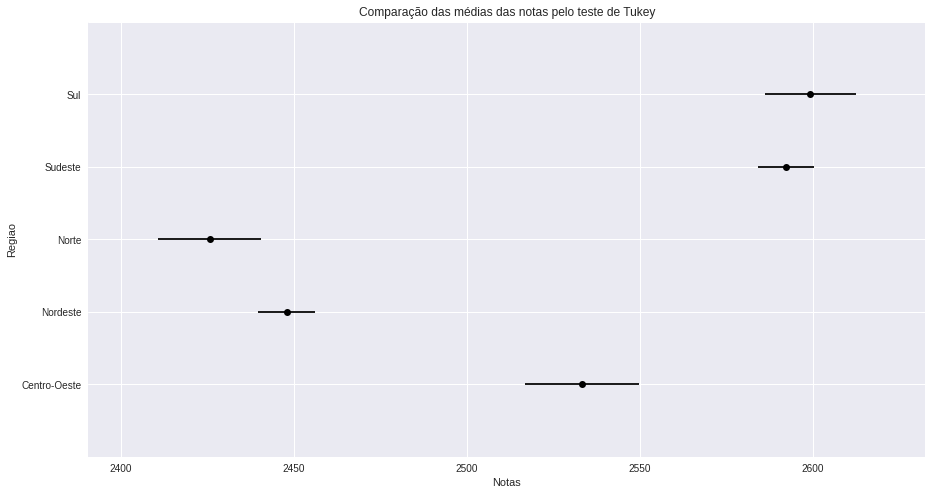

In [ ]:
fig = comparacao.plot_simultaneous(figsize=(15,8),xlabel ='Notas', ylabel = 'Regiao')
plt.title('Comparação das médias das notas pelo teste de Tukey')
plt.plot()

## 4. Conclusões e Discussões

<p align="justify">Primeiramente é valido deixar novamente claro que este é um estudo que tem por principal objetivo desenvolver as habilidades em análise de dados, estatística, python e áreas correlatas. Os dados utilizados foram apenas uma pequena parcela e que apesar de ter-se tentado tomar cuidado em aleatorizar e manter os dados independentes pode haver conclusões muito diferentes.</p>



<p align="justify">O objetivo inicial era de verificar se as notas totais média dos estudantes por região que realizaram o ENEM 2019 eram similares estatisticamente. Após atender as premissas estatísticas e de realizar o teste de Kruskal-Wallis, que é uma versão não paramétrica da ANOVA, pode-se dizer, com um nível de significância de 0,05, que há fortes indícios que há pelo menos uma média diferente entre as regiões.</p> 


<p align="justify">Além disso, com o teste de Tukey, foi possível identificar, também com um nível de significância de 0,05, as diferenças entre as médias. Neste caso, Norte e Nordeste possuem medias estatisticamente iguais (as menores), assim como Sul e Sudeste (as maiores).</p>

<p align="justify">Do total investido em educação em 2018, o Sudeste, seguido do Nordeste, tiveram os maiores investimentos e o Norte, seguido do Centro-Oeste, os menores.</p>

<p align="justify">Pode-se verificar, somente com esta amostra, que as regiões Sudeste e Nordeste, possuem o maior numero de alunos que realizaram o ENEM 2019. Fazendo uma extensão dessa ideia, especula-se que estas regiões possuam o maior numero de estudantes de forma geral e portanto, recebam os maiores investimentos.</p>

<p align="justify">Relacionando as notas médias com os investimentos em 2018, pode-se pensar que o maior investimento resultou em melhores notas medias, porém para o Nordeste, não foi o caso. Algo semelhante pode ser pensado com relação ao Centro-Oeste, menor investimento, porém apresenta a terceira melhor nota. O que fica claro no caso dos investimentos, é que são muitos fatores que precisam ainda ser levados em consideração: numero total de alunos, escolas municipais, estaduais e outros investimentos.</p>

<p align="justify">Futuros trabalhos abordando esse tema: primeiramente tratar mais dados, quanto mais dados, melhor. Também, Levar em consideração os tipos de escolas públicas onde os alunos estudaram para poder relacionar de forma precisa com os investimentos. Outro ponto, considerar os dados de despesas com educação de anos anteriores para melhor identificar a relação de investimento, e melhorar o investimento nesse país. Investigar a possibilidade com esses dados gerar um modelo que prevê onde serão as melhores notas.</p>


## 5. Referências

[1] Dados Alura: "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true" 

[2] Dados portal da Transparencia 2018 http://www.portaltransparencia.gov.br/funcoes/12-educacao?ano=2018

[3] ANOVA - https://pt.wikipedia.org/wiki/An%C3%A1lise_de_vari%C3%A2ncia

[4] Kruskal-Wallis ANOVA - https://en.wikipedia.org/wikiKruskal%E2%80%93Wallis_one-way_analysis_of_variance

[5] Tukey's Test - https://en.wikipedia.org/wiki/Tukey%27s_range_test

